In [17]:
import numpy as np
import seaborn as sb
import pandas as pd 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from skimage import io
from sklearn.utils import shuffle
from time import time
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import string
import copy

Зчитуємо датасет

In [2]:
df = pd.read_csv("C:/Users/LEGION/anaconda3/wineQT.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df.drop(columns = "Id")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


Стандартизуємо дані

In [4]:
X = df.iloc[:,0:-2].values
y = df.iloc[:,-2].values
x = StandardScaler().fit_transform(X)

In [5]:
pd.DataFrame(data = x).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382


Виконуємо алгоритм

In [6]:
pca = PCA(n_components = 2).fit_transform(x)
tsne = TSNE(n_components = 2, perplexity=35, random_state=1).fit_transform(x)
columns = ["Component " + str(i+1) for i in range(2)]
df_pca = pd.DataFrame(data = pca, columns = columns)
df_tsne = pd.DataFrame(data = tsne, columns = columns)

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Візуалізуємо Плоти

[Text(0.5, 1.0, 'TSNE')]

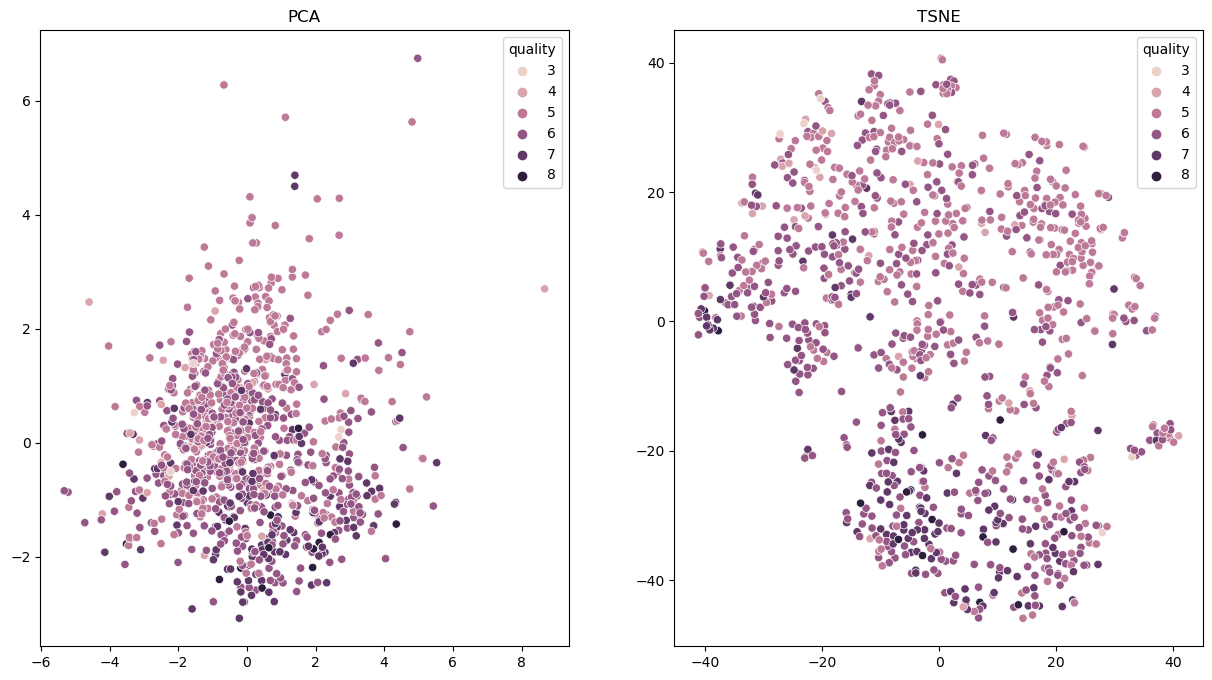

In [7]:
fig, axes = plt.subplots(1,2, figsize = (15,8))
sb.scatterplot(x = pca.T[0], y = pca.T[1], ax = axes[0], hue = df["quality"]).set(title="PCA")
sb.scatterplot(x = tsne.T[0], y = tsne.T[1], ax = axes[1], hue = df["quality"]).set(title="TSNE")

Гістограми PCA

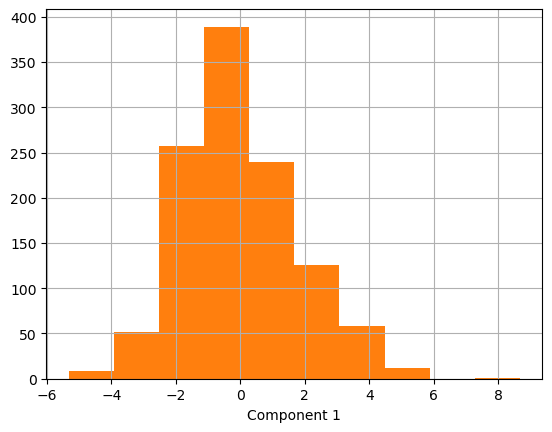

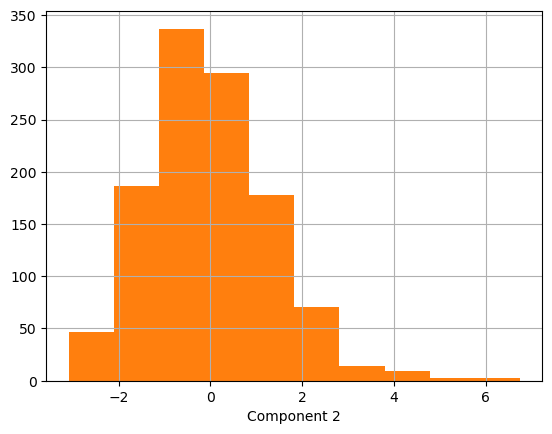

In [8]:
for i in range (0,len(columns)):
    hist = df_pca[df_pca.columns[i]].hist()
    plt.hist(df_pca[df_pca.columns[i]])
    plt.xlabel(df_pca.columns[i])
    plt.show()

Гістограми TSNE

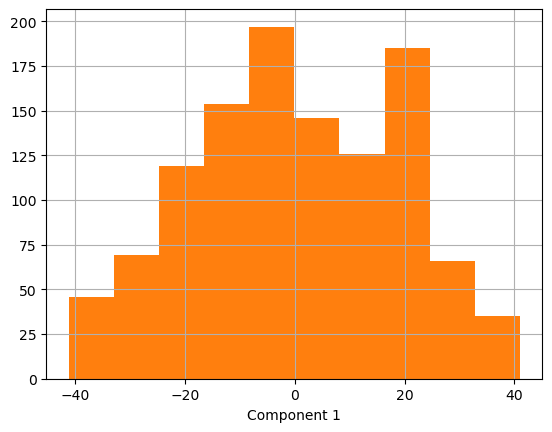

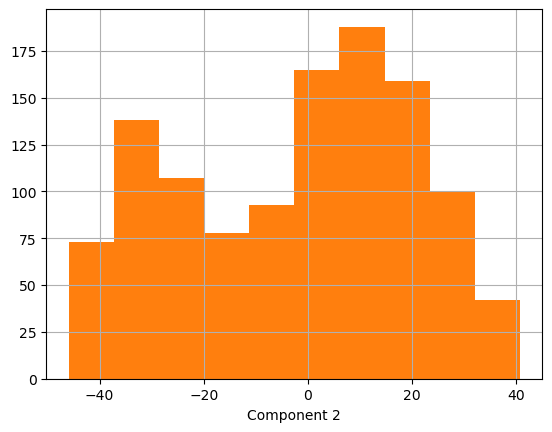

In [9]:
for i in range (0,len(columns)):
    hist = df_tsne[df_tsne.columns[i]].hist()
    plt.hist(df_tsne[df_tsne.columns[i]])
    plt.xlabel(df_tsne.columns[i])
    plt.show()

Введення та квантування зображення

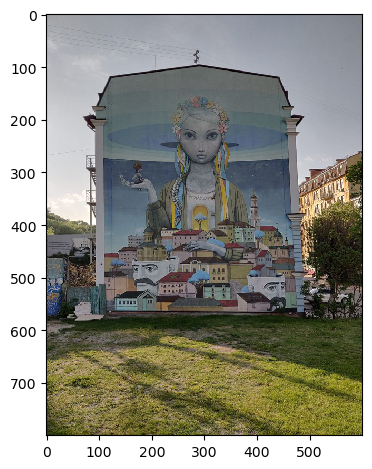

In [10]:
n_colors = [64, 32, 16, 8]
pic = io.imread("C:/Users/LEGION/anaconda3/lab2.jpg")
np_pic = np.array(pic, dtype=np.float64)/255
w, h, d = tuple(np_pic.shape)
assert d == 3
pic_array = np.reshape(np_pic, (w * h, d))
io.imshow(pic)

Number of colors: 64
Fitting : --- 0.32938575744628906 seconds ---
Predicting : --- 0.1575791835784912 seconds ---


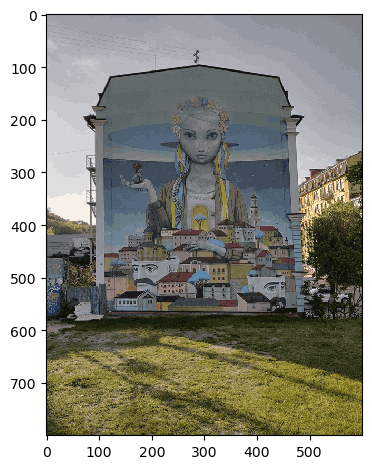

Number of colors: 32
Fitting : --- 0.19148874282836914 seconds ---
Predicting : --- 0.10372257232666016 seconds ---


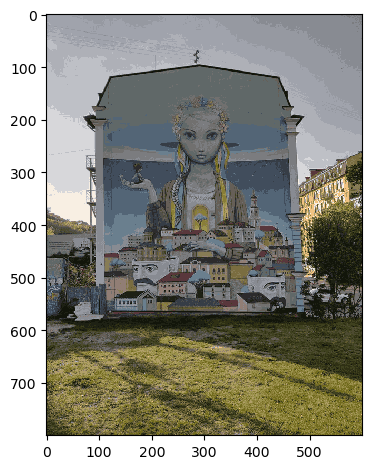

Number of colors: 16
Fitting : --- 0.13582253456115723 seconds ---
Predicting : --- 0.09873723983764648 seconds ---


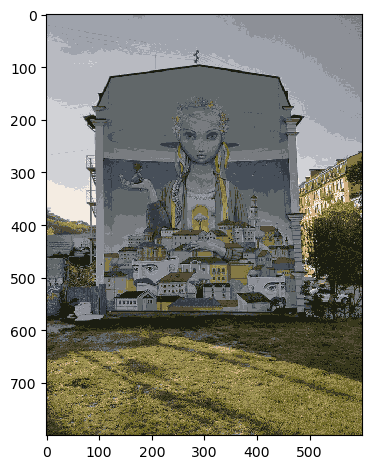

Number of colors: 8
Fitting : --- 0.10272574424743652 seconds ---
Predicting : --- 0.09574413299560547 seconds ---


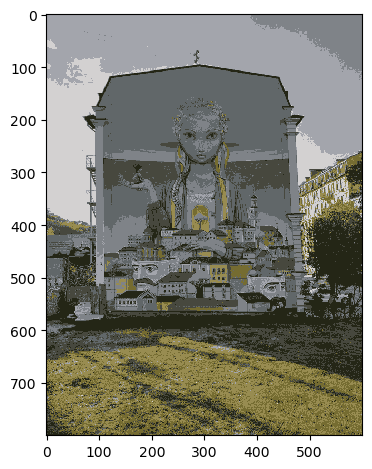

In [11]:
for n in n_colors:
    print("Number of colors: " + str(n))
    t = time()
    
    sample = shuffle(pic_array, random_state=1, n_samples=1_000)
    kmeans = KMeans(n_clusters=n, random_state=1).fit(sample)

    print("Fitting : --- %s seconds ---" % (time() - t))

    
    t0 = time()
    
    prediction = kmeans.predict(pic_array)
    
    print("Predicting : --- %s seconds ---" % (time() - t0))
    
    io.imshow(kmeans.cluster_centers_[prediction].reshape(w, h, -1))
    plt.show()

Зчитуємо датасет, оброблюємо, розбиваємо

In [12]:
df = pd.read_csv("C:/Users/LEGION/anaconda3/tweets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [13]:
df.rename(columns = {'Tweet':'text'}, inplace = True)

In [14]:
df = df.iloc[:,1:-1]
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

Визначаємо функції для чистки тексту, чистимо

In [15]:
def remove_stopwords(text, stoplist):
    return [word for word in text if word not in stoplist]

def remove_punctuation(text):
    punctuation = string.punctuation
    return ''.join([c if c not in punctuation else ' ' for c in text])

def remove_spaces(text):
    return re.sub(r'\s+', ' ', text)

cleaned_text = [remove_punctuation(remove_spaces(str(text).lower())) for text in X['text']]
X['text'] = cleaned_text
X

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11572\4205045100.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = cleaned_text


,text
0,mainstream media has done an amazing job at br...
1,tesla delivery estimates are at around 364k fr...
2,3 even if i include 63 0m unvested rsus as of...
3,realdanodowd wholemarsblog tesla hahaha why...
4,realdanodowd tesla stop trying to kill kids ...
...,...
80788,some of the fastest growing tech stocks on the...
80789,with earnings on the horizon here is a quick ...
80790,our record delivery results are a testimony of...
80791,we delivered 10 412 smart evs in sep 2021 rea...


WordCloud

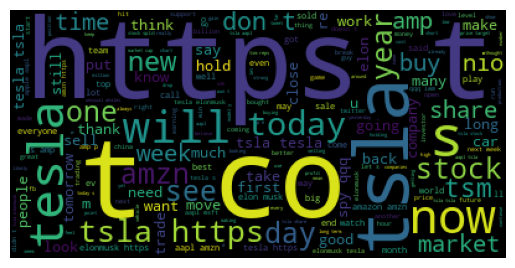

In [18]:
text = copy.deepcopy(X['text'])
text = text.tolist()
text = ' '.join(text)
cloud = WordCloud(collocations=True).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [19]:
vz = TfidfVectorizer()
x = vz.fit_transform(X["text"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state = 42)

In [21]:
forest = RandomForestClassifier(n_estimators=50, max_depth=70)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, n_estimators=50)

              precision    recall  f1-score   support

        AAPL       0.41      0.24      0.30      2528
         AMD       0.25      0.09      0.14      1122
        AMZN       0.01      0.01      0.01      2016
          BA       0.01      0.00      0.01       215
          BX       0.00      0.00      0.00        19
        COST       0.14      0.04      0.06       207
         CRM       0.10      0.02      0.03       107
         DIS       0.48      0.12      0.20       330
        ENPH       0.00      0.00      0.00       116
           F       0.00      0.00      0.00        17
        GOOG       0.21      0.08      0.12       686
        INTC       0.23      0.11      0.15       159
          KO       0.24      0.22      0.23       145
        META       0.28      0.12      0.17      1357
        MSFT       0.01      0.00      0.00      2111
        NFLX       0.12      0.03      0.04       884
         NIO       0.54      0.10      0.17      1435
         NOC       0.00    

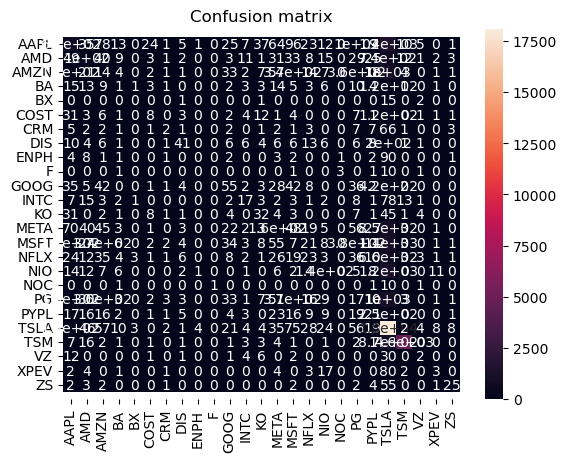

In [22]:
def Metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
def Metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))
    print('Train score', forest.score(X_train, y_train))
    print('Test Score', forest.score(X_test, y_test))
    ax = plt.axes()
    CM = confusion_matrix(y_test, y_pred)
    sb.heatmap(CM, annot = True, ax = ax, xticklabels=['AAPL', 'AMD', 'AMZN', 'BA', 'BX', 'COST', 'CRM', 'DIS', 'ENPH', 'F', 'GOOG', 'INTC', 'KO', 'META', 'MSFT', 'NFLX', 'NIO', 'NOC', 'PG', 'PYPL', 'TSLA', 'TSM', 'VZ', 'XPEV', 'ZS'], yticklabels=['AAPL', 'AMD', 'AMZN', 'BA', 'BX', 'COST', 'CRM', 'DIS', 'ENPH', 'F', 'GOOG', 'INTC', 'KO', 'META', 'MSFT', 'NFLX', 'NIO', 'NOC', 'PG', 'PYPL', 'TSLA', 'TSM', 'VZ', 'XPEV', 'ZS'])
    ax.set_title('Confusion matrix')
    i, k = ax.get_ylim() 
    ax.set_ylim(i+0.5, k-0.5)
    plt.show()

Metrics(forest, X_test, y_test)